In [29]:
#Импортируем библиотеки
import pandas as pd
import numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt
import scipy 
from scipy.stats import stats

%matplotlib inline 
sns.set('notebook')

from sklearn.preprocessing import LabelEncoder

In [30]:
#Загружаем файл
ikea = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv')

<h3>Изучение набора данных IKEA</h3>

<h2>IKEA</h2>

>Dataframe содержит 3694 строки и 14 колонок, имеет пустые значения, не имеет дубликатов.
<h4>Колонки</h4>
 <li><b>item_id</b> - идентификатор элемента</li>
<li><b>name</b> - название дизайнера</li>
<li><b>category</b> - категория мебели</li>
<li><b>price</b> - стоимость товара </li>
<li><b>old_price</b> - цена товара до скидки</li>
<li><b>sellable_online</b> - доступен ли товар для покупки в интернете</li>
<li><b>link	</b> - ссылка на товар</li>
<li><b>other_colors</b> - наличие других цветов или только один цвет</li>
<li><b>short_description</b> - краткое описание предмета</li>
<li><b>designer</b> - имя дизайнера,спроектировавшего товар </li>
<li><b>depth</b> - глубина в сантиметрах</li>
<li><b>height</b> - высота  в сантиметрах</li>
<li><b>width</b> - ширина  в сантиметрах</li>



In [31]:
#Выводим верхние значения для ознакомления с датафреймом
ikea.head(10)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,10122647,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
7,7,60155602,DALFRED,Bar furniture,195.0,No old price,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,NaN,50.0
8,8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
9,9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN


In [32]:
#Выводим нижние значения для ознакомления с датафреймом
ikea.tail(10)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3684,3684,49157565,ELVARLI,Wardrobes,1245.0,"SR 1,735",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 165x55x216 cm",Ehlén Johansson/IKEA of Sweden,55.0,216.0,164.0
3685,3685,59324936,PAX / FORSAND,Wardrobes,2100.0,No old price,True,https://www.ikea.com/sa/en/p/pax-forsand-wardr...,Yes,"Wardrobe combination, 100x60x...",IKEA of Sweden/Ehlén Johansson,60.0,236.0,100.0
3686,3686,69330475,PAX / HOKKSUND,Wardrobes,3985.0,No old price,True,https://www.ikea.com/sa/en/p/pax-hokksund-ward...,No,"Wardrobe combination, 150x66x...",IKEA of Sweden/Ehlén Johansson,66.0,236.0,150.0
3687,3687,79302995,ELVARLI,Wardrobes,1611.0,"SR 1,815",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3688,3688,89330653,PAX / MEHAMN/AULI,Wardrobes,2045.0,No old price,True,https://www.ikea.com/sa/en/p/pax-mehamn-auli-w...,No,"Wardrobe combination, 200x66x...",IKEA of Sweden/Ehlén Johansson,66.0,236.0,200.0
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [33]:
#Выводим описательную статистику по датафрейму
ikea.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [34]:
#Общая информацию по датафрейму
ikea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [35]:
#Проверяем наличие пропущеных значений 
ikea.isna().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [36]:
#Проверка на дубликаты
ikea.duplicated().sum()

0

In [37]:
#Просмотр количества столбцов и колонок
ikea.shape

(3694, 14)

In [39]:
#Просмотр уникальных значений по колонке 'category'
ikea['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [41]:
#Просмотр уникальных значений по колонке 'other_colors'
ikea['other_colors'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
#Просмотр уникальных значений по колонке 'sellable_online'
ikea['sellable_online'].unique()

array([ True, False])

In [43]:
#Количество товаров по каждому дизайнеру колонки 'name'
ikea.groupby('name').item_id.count().reset_index().sort_values(by='item_id', ascending=False)

,name,item_id
30,BESTÅ,173
412,PAX,111
163,GRÖNLID,83
22,BEKANT,74
545,TROFAST,74
...,...,...
445,RISATORP,1
191,HORNAVAN,1
449,RÅDVIKEN,1
186,HILVER / GODVIN,1


>Больше всего товаров дизайнера имени 'BESTÅ'

In [44]:
#Самые дорогие товары в категории 
ikea.groupby('category').agg({
  "price": "max"  
}).reset_index().sort_values(by='price', ascending=False)

,category,price
12,Sofas & armchairs,9585.0
1,Beds,9585.0
16,Wardrobes,8380.0
14,Tables & desks,6965.0
5,Chairs,6965.0
3,Cabinets & cupboards,6480.0
9,Outdoor furniture,5144.0
2,Bookcases & shelving units,4335.0
13,TV & media furniture,4260.0
10,Room dividers,2397.0


In [45]:
#Самые дешевые товары в категории 
ikea.groupby('category').agg({
  "price": "min"  
}).reset_index().sort_values(by='price', ascending=True)

,category,price
2,Bookcases & shelving units,3.0
3,Cabinets & cupboards,3.0
13,TV & media furniture,3.0
8,Nursery furniture,5.0
7,Children's furniture,5.0
14,Tables & desks,9.0
9,Outdoor furniture,9.0
5,Chairs,11.4
12,Sofas & armchairs,27.0
1,Beds,30.0


In [46]:
#Средняя цена за единицу по каждой категории 
ikea.groupby('category').agg({
  "price": "mean"  
}).reset_index().sort_values(by='price', ascending=False)

,category,price
16,Wardrobes,2162.141949
12,Sofas & armchairs,2004.016355
1,Beds,1647.432692
14,Tables & desks,1129.395425
11,"Sideboards, buffets & console tables",1068.086957
5,Chairs,1048.932640
10,Room dividers,932.000000
9,Outdoor furniture,859.826852
3,Cabinets & cupboards,789.015753
0,Bar furniture,679.553191


In [47]:
#Сумарная стоимость по каждой категории мебели
ikea.groupby('category').agg({
  "price": "sum"  
}).reset_index().sort_values(by='price', ascending=False)

,category,price
12,Sofas & armchairs,857719.0
14,Tables & desks,691190.0
16,Wardrobes,510265.5
5,Chairs,504536.6
1,Beds,342666.0
2,Bookcases & shelving units,284640.0
3,Cabinets & cupboards,230392.6
9,Outdoor furniture,185722.6
13,TV & media furniture,125219.6
6,Chests of drawers & drawer units,76522.5


<AxesSubplot:xlabel='price', ylabel='category'>

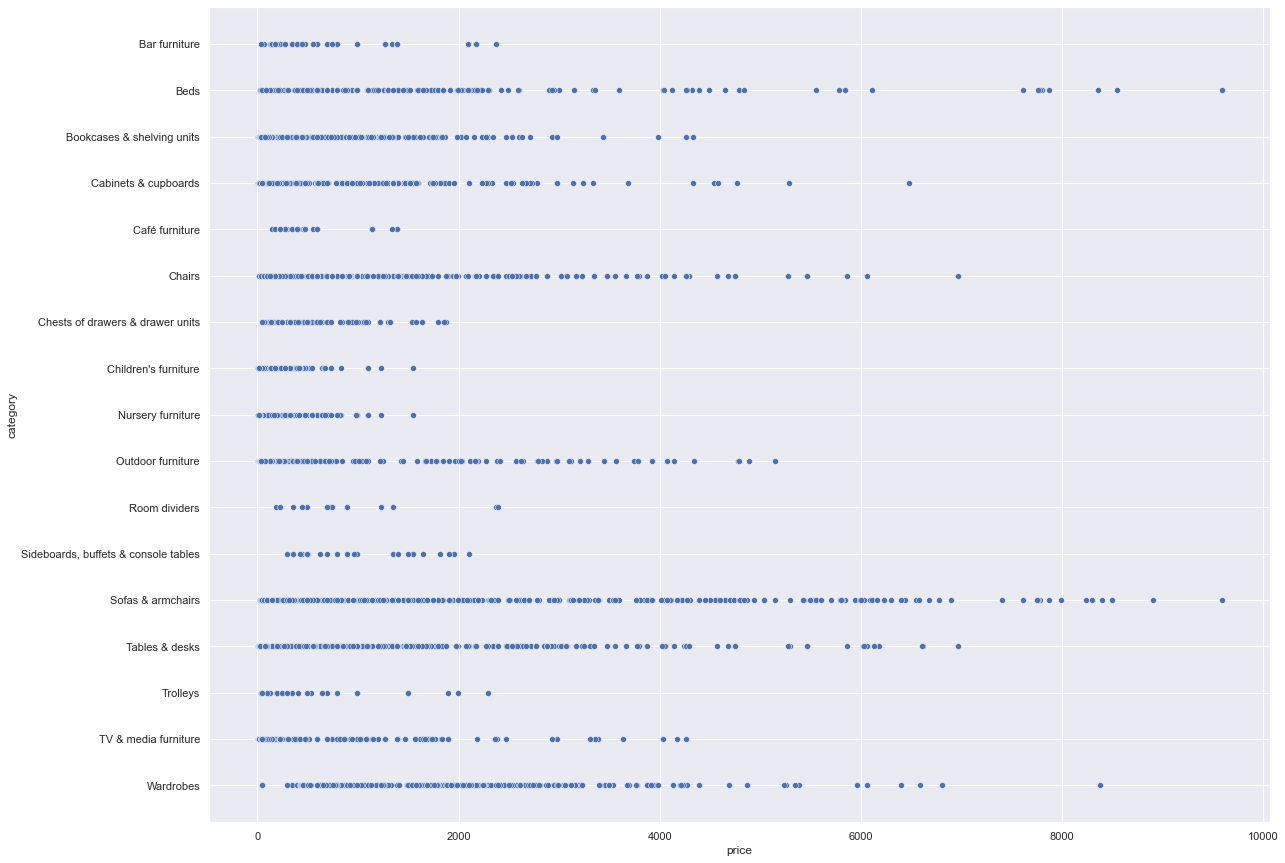

In [48]:
#Визуализируем разброс цены товаров по категории
plt.subplots(figsize = (19,15))
sns.scatterplot(x='price', y = 'category', data = ikea)

>Наибольшая суммарная стоимость у категории Sofas & armchairs. Самые дорогие товары у категории Beds и Sofas & armchairs.

In [49]:
#Количество позиций по каждой категории товаров
ikea['category'].value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='category'>

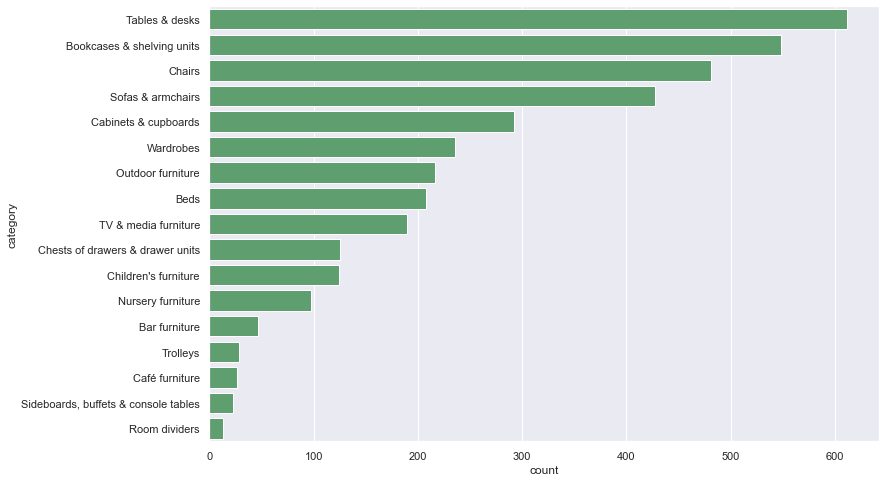

In [50]:
#Построим график количества позиций по каждой категории товаров
order = ikea['category'].value_counts().index
color = sns.color_palette()[0]
color1 = sns.color_palette()[2]

plt.figure(figsize=[12, 8])

sns.countplot(data=ikea, y='category', order=order, color=color1)

>Наибольше товаров категории 'Tables & desks'

In [51]:
#Заменяем символы для дальнейшего преобразования
ikea['old_price']= ikea['old_price'].astype(str).str.replace('No old price', '0')
ikea['old_price'] = ikea['old_price'].str.replace('SR', '')
ikea['old_price'] = ikea['old_price'].str.replace(',', '')

In [52]:
#Преобразовуем в числовой тип
ikea['old_price']=pd.to_numeric(ikea['old_price'],errors = 'coerce')

In [53]:
#Заменяем данные с 0 
def fix_old_price(ikea):
    if ikea['old_price']  == 0:
        return ikea['price']
    else:
        return ikea['old_price']  
    
ikea['old_price'] = ikea.apply(fix_old_price, axis=1)
ikea['old_price'] = ikea['old_price'].fillna(0)

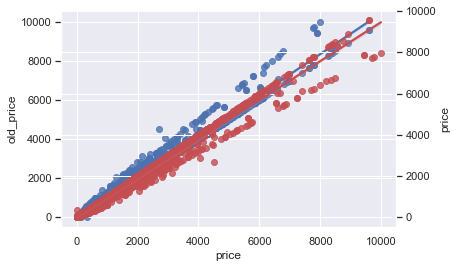

<Figure size 1440x720 with 0 Axes>

In [54]:
# Визиализируем отношение старой цены к цене после скидки
fig, ax = plt.subplots()
plt.figure(figsize=[20, 10])
sns.regplot(x='price', y='old_price', data=ikea, ax=ax)
ax2 = ax.twinx()
sns.regplot(x='old_price', y='price', data=ikea, ax=ax2, color='r')
plt.show()

>На графике видно связь между старой ценой и ценой после скидки, виден рост величины скидки по мере роста цены, что говорит о зависимости между ценой и размером скидки

In [55]:
#Подсчитываем скидку
ikea['discount'] = ikea['old_price'] - ikea['price']
ikea['discount']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
3689     70.0
3690    183.0
3691    126.0
3692    385.0
3693    304.0
Name: discount, Length: 3694, dtype: float64

In [56]:
# Количество товар без скидки
ikea[ikea['discount'] == 0].item_id.count()

3040

<AxesSubplot:xlabel='discount', ylabel='price'>

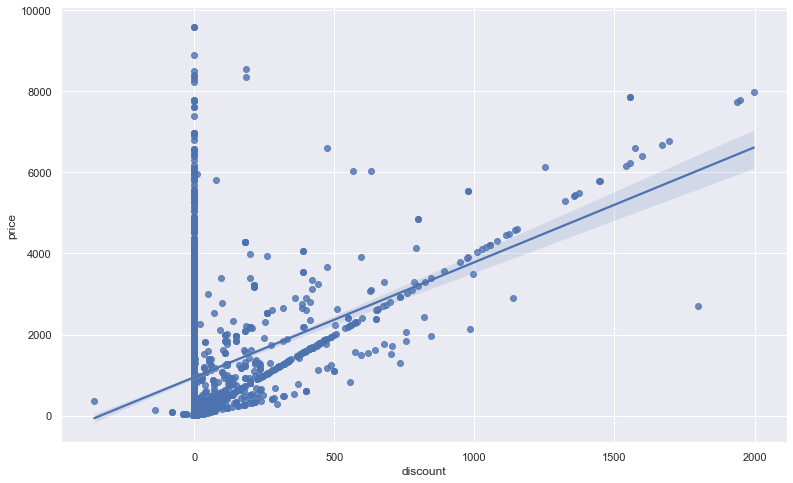

In [57]:
# Визиализируем отношение старой цены к скидки
plt.figure(figsize=[13, 8])

sns.regplot(x='discount', y='price', data=ikea)

>Большенство товаров без скидки, товары дороже 8000 не имеют скидки.

In [58]:
#Количество позиций продаваемых онлайн
ikea['sellable_online'].value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

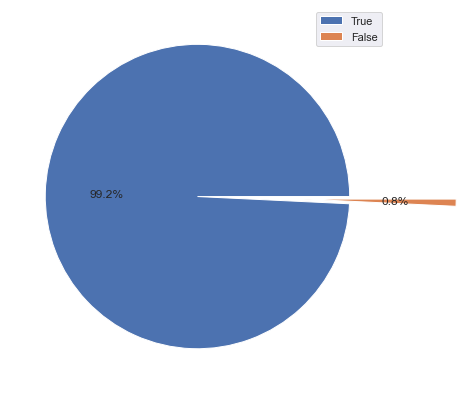

In [59]:
count_sel_onl = ikea['sellable_online'].value_counts()

plt.figure(figsize=[7, 7])
explode = (0, 0.7)

plt.pie(count_sel_onl, explode=explode, autopct='%1.1f%%')

plt.legend(ikea['sellable_online'])

>99,2% товаров розмещенны в онлайн-магазине

In [60]:
#Количество позиций c разными цветами и в одном цвете
ikea['other_colors'].value_counts()

No     2182
Yes    1512
Name: other_colors, dtype: int64

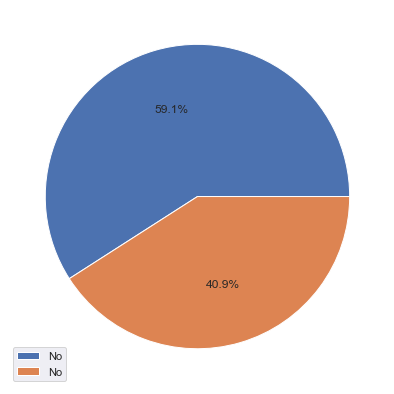

In [61]:
count_oth_col = ikea['other_colors'].value_counts()

plt.figure(figsize=[7, 7])
explode = (0, 0)

plt.pie(count_oth_col, explode=explode, autopct='%1.1f%%')

plt.legend(ikea['other_colors'])

>59,1% товаров представленны в одном цвете

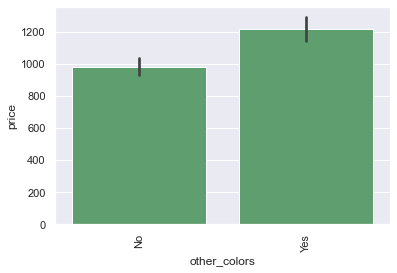

In [62]:
#Визуализация сумарной цены позиций c разными цветами и в одном цвете
plt.figure(figsize=[6, 4])

sns.barplot(data=ikea, y='price', x='other_colors', color=color1)
plt.xticks(rotation=90);

>Мебель с разными цветовыми вариантами исполнения стоит дороже

In [63]:
#С помошью групировки по колонке 'category' получаем максимальные значения для каждой category
ikea.groupby('category').agg({
  "width": "max",
  "height": "max",
  "depth": "max"  
}).reset_index()

,category,width,height,depth
0,Bar furniture,80.0,114.0,60.0
1,Beds,387.0,195.0,164.0
2,Bookcases & shelving units,344.0,240.0,159.0
3,Cabinets & cupboards,320.0,301.0,100.0
4,Café furniture,74.0,105.0,51.0
5,Chairs,159.0,173.0,164.0
6,Chests of drawers & drawer units,161.0,145.0,60.0
7,Children's furniture,150.0,192.0,69.0
8,Nursery furniture,150.0,192.0,79.0
9,Outdoor furniture,341.0,179.0,144.0


In [64]:
#С помошью групировки по колонке 'category' получаем среднее значения для каждой category
ikea.groupby('category').agg({
  "width": "mean",
  "height": "mean",
  "depth": "mean"  
}).reset_index()

,category,width,height,depth
0,Bar furniture,52.945946,97.571429,46.925926
1,Beds,141.983784,82.847134,81.734940
2,Bookcases & shelving units,106.563008,131.097285,36.922737
3,Cabinets & cupboards,98.750000,113.408696,37.493671
4,Café furniture,54.333333,80.954545,44.785714
5,Chairs,66.156812,76.837931,60.676259
6,Chests of drawers & drawer units,76.664000,78.487805,47.157025
7,Children's furniture,63.000000,75.857143,44.521277
8,Nursery furniture,64.709677,84.821429,43.090909
9,Outdoor furniture,88.154762,75.503817,68.221154


>С группировки видно, что у объектов две из трех сторон имеют превосходящий размер ,что можно использовать при определени категории мебели.

In [65]:
#Заполняем средним пустые значения 'width', 'height', 'depth'
ikea[['width', 'height', 'depth']] = ikea.groupby(['category'])['width', 'height', 'depth'].transform(lambda x: x.fillna(x.mean()))

C:\Users\Стас\AppData\Local\Temp\ipykernel_16308\2266325458.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ikea[['width', 'height', 'depth']] = ikea.groupby(['category'])['width', 'height', 'depth'].transform(lambda x: x.fillna(x.mean()))


In [66]:
#Обьем мебели
ikea['v_furniture']=(ikea['depth']*ikea['height']*ikea['width'])/100**3

(0.0, 9000.0)

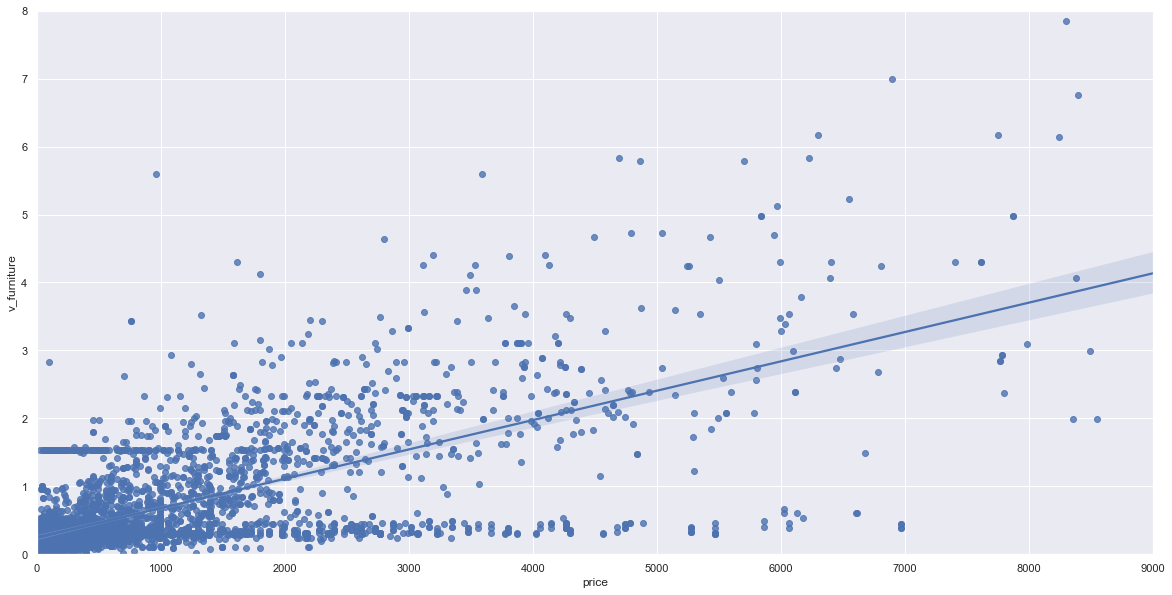

In [67]:
# Визиализируем отношение старой цены к скидки
plt.figure(figsize=[20, 10])

sns.regplot(x='price', y='v_furniture', data=ikea)
plt.ylim(0,8)
plt.xlim(0,9000)

In [68]:
#Средний обьем по категории 
ikea.groupby('category').v_furniture.mean().to_frame()

,v_furniture
category,
Bar furniture,0.243797
Beds,1.072271
Bookcases & shelving units,0.594176
Cabinets & cupboards,0.492954
Café furniture,0.202506
Chairs,0.332867
Chests of drawers & drawer units,0.297941
Children's furniture,0.237278
Nursery furniture,0.267895


>По полученным данным видно, что больнее дешевые имеют небольшой объем

In [69]:
#Кодирование категорий
le = LabelEncoder()
le. fit(ikea.category)
ikea['category_le'] = le.transform(ikea.category)
ikea['category_le']

0        0
1        0
2        0
3        0
4        0
        ..
3689    16
3690    16
3691    16
3692    16
3693    16
Name: category_le, Length: 3694, dtype: int32

In [70]:
#Кодирование 'other_colors'
le = LabelEncoder()
le.fit(ikea.other_colors)
ikea['other_colors_le'] = le.transform(ikea.other_colors)
ikea['other_colors_le']

0       0
1       0
2       0
3       1
4       0
       ..
3689    0
3690    0
3691    0
3692    0
3693    0
Name: other_colors_le, Length: 3694, dtype: int32

In [71]:
#Создаем колонки с площадями сторон мебели
ikea['s1'] = ikea['depth']*ikea['height']
ikea['s2'] = ikea['width']*ikea['height']
ikea['s3'] = ikea['width']*ikea['depth']

In [72]:
#Проверка на пустые значения перед обучением модели
ikea.isna().sum()

Unnamed: 0           0
item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
discount             0
v_furniture          0
category_le          0
other_colors_le      0
s1                   0
s2                   0
s3                   0
dtype: int64

<h1>Проверка гипотез</h1>

<h2>1.Проверка разницы между двумя средними значениями совокупности</h2>

>Используем уровень значимости альфа, чтобы проверить, существенно ли отличается разница между двумя средними значениями совокупности
<h4>Гипотеза:различие средних цен мебели с разными цветами и с одним цветом.</h4> 
<ul><li>Сформулирую нулевую гипотезу (Н₀) — среднее значение  одинаковое</li>
<li>Сформулирую альтернативную гипотезу (Н₁) — среднее значение разное</li></ul>

In [73]:
#Совокупности на основании товаров с разными цветами и одним цветом
other_colors_y = ikea[ikea['other_colors'] == 'Yes']
other_colors_n = ikea[ikea['other_colors'] == 'No']

#Для проверки возьмем цены на товары с разными цветами и одним цветом
results = stats.ttest_ind(other_colors_y['price'], other_colors_n['price'],equal_var=False)#Hормальность не соблюдается

alpha = 0.01

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 8.753557081141471e-07
Отвергаем нулевую гипотезу


C:\Users\Стас\AppData\Local\Temp\ipykernel_16308\100490891.py:6: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = stats.ttest_ind(other_colors_y['price'], other_colors_n['price'],equal_var=False)#Hормальность не соблюдается


>Тест показывает, что гипотеза Н₀ не подтверждена, следовательно, нулевая гипотеза отвергается. Поэтому принимается альтернативная гипотеза Н₁, cреднее значение разное.

<h2>Проверка гипотезы на нормальность</h2>

<h4>Гипотеза:проверка на нормальность.</h4> 
<ul><li>Сформулирую нулевую гипотезу (Н₀) — данные распределены нормально</li>
<li>Сформулирую альтернативную гипотезу (Н₁) — данные не имеют нормального распределения</li></ul>

In [74]:
# Сделаем генеральное распределение для проведение теста
alpha2 = 0.01
# Тест Шапиро-Уилк
stat, p = scipy.stats.shapiro(ikea['discount'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

if p < alpha2:
    print('Отклонить гипотезу о нормальности')
else:
    print('Принять гипотезу о нормальности')


Statistics=0.308, p-value=0.000
Отклонить гипотезу о нормальности


>В результате получили низкое p-value, следовательно, отклоняем нулевую гипотезу.

<h1>Mодель предсказания цены на мебель</h1>

In [75]:
#Удаляем колонки, которые не будут принимать участие в предсказании 
column_d = ['item_id','Unnamed: 0', 'name','link', 'short_description','designer',
            'sellable_online','v_furniture','category','other_colors','old_price','discount']
ikea_ml = ikea.drop(column_d, axis=1)
ikea_ml = ikea_ml.round(2)
ikea_ml


,price,depth,height,width,category_le,other_colors_le,s1,s2,s3
0,265.0,46.93,99.00,51.00,0,0,4645.67,5049.00,2393.22
1,995.0,46.93,105.00,80.00,0,0,4927.22,8400.00,3754.07
2,2095.0,46.93,97.57,52.95,0,0,4578.63,5166.01,2484.54
3,69.0,50.00,100.00,60.00,0,1,5000.00,6000.00,3000.00
4,225.0,60.00,43.00,74.00,0,0,2580.00,3182.00,4440.00
...,...,...,...,...,...,...,...,...,...
3689,750.0,50.00,216.54,91.00,16,0,10826.89,19704.93,4550.00
3690,1572.0,50.00,216.54,135.00,16,0,10826.89,29232.59,6750.00
3691,924.0,50.00,216.54,175.00,16,0,10826.89,37894.10,8750.00
3692,2745.0,50.00,216.54,178.00,16,0,10826.89,38543.72,8900.00


In [76]:
#Проверим на пустые значения 
ikea_ml.isna().sum()

price              0
depth              0
height             0
width              0
category_le        0
other_colors_le    0
s1                 0
s2                 0
s3                 0
dtype: int64

In [77]:
#Импортируем нужные библиотеки 
from sklearn.model_selection import train_test_split

In [78]:
X = ikea_ml.drop(['price'], axis=1)
y = ikea_ml['price']
y=y.astype('int')
print(X.shape)
print(y.shape)

(3694, 8)
(3694,)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2585, 8)
(2585,)
(1109, 8)
(1109,)


In [80]:
#Импортируем нужные библиотеки
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

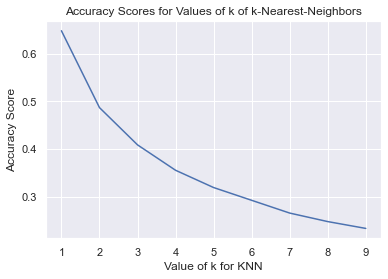

In [81]:
#Показатели точности для значений k из k ближайших соседей
k_range = list(range(1,10))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X, y)
    
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred)) 
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [82]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

knn.predict([[50.00,216.54,179.00,7,0,1826.89,38543.72,900.00]])

C:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([940])

<li>При выборе параметров для обучения модели были исключены колонки:''item_id','Unnamed: 0', 'name','link', 'short_description','designer', 'sellable_online','v_furniture','category','other_colors','old_price','discount'.</li>
<li>Для параметров 'width', 'height', 'depth', которые имели пустые значения, применено заполнение средним значением по группе мебели</li>
<li>Дополнительно включены значения площадей каждой проекции изделия </li>


>Для повышения производительности модели необходимо улучшить обработку отсутствующих значений и значений исключений.Поработать над преобразованием необработанных данных в признаки.